In [1]:
import sys
sys.path.append("..")

In [28]:
from datasets import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#SAT_df=get_SATScores()
#SAT_df=pd.read_csv('https://data.cityofnewyork.us/resource/rt5r-ie69.csv')
#SAT_df.head(50)

In [29]:
def get_SAT_by_District():
    SAT_df=get_SATScores('2010')
    SAT_df = SAT_df.dropna()
    SAT_df.critical_reading_mean = SAT_df.critical_reading_mean.astype('int')
    SAT_df.mathematics_mean= SAT_df.mathematics_mean.astype('int')
    SAT_df.writing_mean = SAT_df.writing_mean.astype('int')
    SAT_df.number_of_test_takers=SAT_df.number_of_test_takers.astype('int')
    
    SAT_df['combined_score'] = SAT_df['critical_reading_mean']+SAT_df['mathematics_mean']+SAT_df['writing_mean']


    SAT_df = SAT_df[['dbn','school_name','combined_score','number_of_test_takers']]
    
    SAT_df['district']=SAT_df.dbn.str[:2]
    
    SAT_df = SAT_df[['district','school_name','combined_score','number_of_test_takers']]
    SAT_df.district=SAT_df.district.astype('int')

    SAT_DF_District=pd.DataFrame()
    
    SAT_DF_District['Total_Takers']=SAT_df.groupby('district')['number_of_test_takers'].sum()
    
    SAT_DF_District['Combined_SAT_scores']=SAT_df.groupby('district')['combined_score'].mean()
    
    SAT_DF_District['District']=SAT_DF_District.index
    SAT_DF_District.District=SAT_DF_District.District.astype('int')

    SAT_DF_District.reset_index(drop=True, inplace=True)
    
    SAT_DF_District = SAT_DF_District[['District','Total_Takers','Combined_SAT_scores']]
    
    return SAT_DF_District,SAT_df





In [30]:
def get_SAT_by_District_2012():
    SAT_df=get_SATScores('2012')
    SAT_df = SAT_df[SAT_df.sat_critical_reading_avg_score != 's']
    SAT_df.sat_critical_reading_avg_score = SAT_df.sat_critical_reading_avg_score.astype('int')
    SAT_df.sat_math_avg_score= SAT_df.sat_math_avg_score.astype('int')
    SAT_df.sat_writing_avg_score= SAT_df.sat_writing_avg_score.astype('int')
    SAT_df.num_of_sat_test_takers=SAT_df.num_of_sat_test_takers.astype('int')
    
    SAT_df['combined_score'] = SAT_df['sat_critical_reading_avg_score']+SAT_df['sat_math_avg_score']+SAT_df['sat_writing_avg_score']


    SAT_df = SAT_df[['dbn','school_name','combined_score','num_of_sat_test_takers']]
    
    SAT_df['district']=SAT_df.dbn.str[:2]
    
    SAT_df = SAT_df[['district','school_name','combined_score','num_of_sat_test_takers']]
    SAT_df.district=SAT_df.district.astype('int')

    SAT_DF_District=pd.DataFrame()
    
    SAT_DF_District['Total_Takers']=SAT_df.groupby('district')['num_of_sat_test_takers'].sum()
    
    SAT_DF_District['Combined_SAT_scores']=SAT_df.groupby('district')['combined_score'].mean()
    
    SAT_DF_District['District']=SAT_DF_District.index
    SAT_DF_District.District=SAT_DF_District.District.astype('int')

    SAT_DF_District.reset_index(drop=True, inplace=True)
    
    SAT_DF_District = SAT_DF_District[['District','Total_Takers','Combined_SAT_scores']]
    
    return SAT_DF_District, SAT_df





In [31]:
def get_SAT_by_District_2015():
    #SAT_df=get_SATScores('2012')
    SAT_df=pd.read_csv('https://drive.google.com/uc?export=download&id=1v9R8nSZ5wnzFMt7i2AFk0qPw7tuPmXwZ')
    SAT_df = SAT_df[['School ID','School Name','Average Score (SAT Math)','Average Score (SAT Reading)','Average Score (SAT Writing)']]
    SAT_df.columns=['dbn','school_name','sat_math_avg_score','sat_critical_reading_avg_score','sat_writing_avg_score']
    #SAT_df = SAT_df[SAT_df.sat_critical_reading_avg_score != 's']
    SAT_df=SAT_df.dropna()
    SAT_df.sat_critical_reading_avg_score = SAT_df.sat_critical_reading_avg_score.astype('int')
    SAT_df.sat_math_avg_score= SAT_df.sat_math_avg_score.astype('int')
    SAT_df.sat_writing_avg_score= SAT_df.sat_writing_avg_score.astype('int')
    #SAT_df.num_of_sat_test_takers=SAT_df.num_of_sat_test_takers.astype('int')
    
    SAT_df['combined_score'] = SAT_df['sat_critical_reading_avg_score']+SAT_df['sat_math_avg_score']+SAT_df['sat_writing_avg_score']


    SAT_df = SAT_df[['dbn','school_name','combined_score']]
    
    SAT_df['district']=SAT_df.dbn.str[:2]
    
    SAT_df = SAT_df[['district','school_name','combined_score']]
    SAT_df.district=SAT_df.district.astype('int')

    SAT_DF_District = pd.DataFrame()
    
    
    SAT_DF_District['Combined_SAT_scores']=SAT_df.groupby('district')['combined_score'].mean()
    
    SAT_DF_District['District']=SAT_DF_District.index
    SAT_DF_District.District=SAT_DF_District.District.astype('int')

    SAT_DF_District.reset_index(drop=True, inplace=True)
    
    SAT_DF_District = SAT_DF_District[['District','Combined_SAT_scores']]
    
    return SAT_DF_District,SAT_df





In [32]:
SAT_df_2010,SAT_df_2010_by_Schools=get_SAT_by_District()
SAT_df_2010 = SAT_df_2010[SAT_df_2010.District < 75]


In [33]:
SAT_df_2012,SAT_df_2012_by_Schools=get_SAT_by_District_2012()
SAT_df_2012 = SAT_df_2012[SAT_df_2012.District < 75]

In [34]:
SAT_df_2015,SAT_df_2015_by_Schools=get_SAT_by_District_2015()

In [39]:
SAT_df_2010 = SAT_df_2010.sort_values(['Combined_SAT_scores'],ascending=False)
SAT_df_2012 = SAT_df_2012.sort_values(['Combined_SAT_scores'],ascending=False)
SAT_df_2015 = SAT_df_2015.sort_values(['Combined_SAT_scores'],ascending=False)

SAT_df_2010_by_Schools = SAT_df_2010_by_Schools.sort_values(['combined_score'],ascending=False)
SAT_df_2012_by_Schools = SAT_df_2012_by_Schools.sort_values(['combined_score'],ascending=False)
SAT_df_2015_by_Schools = SAT_df_2015_by_Schools.sort_values(['combined_score'],ascending=False)



In [46]:
SAT_df_2010_by_Schools.head()

,district,school_name,combined_score,number_of_test_takers
42,2,STUYVESANT HIGH SCHOOL,2087,804
185,10,BRONX HIGH SCHOOL OF SCIENCE,1960,683
442,31,STATEN ISLAND TECHNICAL HIGH SCHOOL,1928,287
384,25,Townsend Harris High School at Queens College,1923,273
193,10,HS of American Studies at Lehman College,1884,74


In [45]:
SAT_df_2012_by_Schools.head()

,district,school_name,combined_score,num_of_sat_test_takers
48,2,STUYVESANT HIGH SCHOOL,2096,832
198,10,BRONX HIGH SCHOOL OF SCIENCE,1969,731
459,31,STATEN ISLAND TECHNICAL HIGH SCHOOL,1953,227
206,10,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,1920,92
396,25,TOWNSEND HARRIS HIGH SCHOOL,1910,278


In [43]:
SAT_df_2015_by_Schools.head()

,district,school_name,combined_score
105,2,Stuyvesant High School,2144
203,10,Bronx High School of Science,2041
110,31,Staten Island Technical High School,2041
208,10,High School of American Studies at Lehman College,2013
385,25,Townsend Harris High School,1981


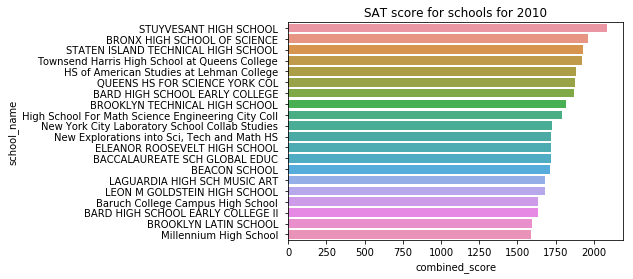

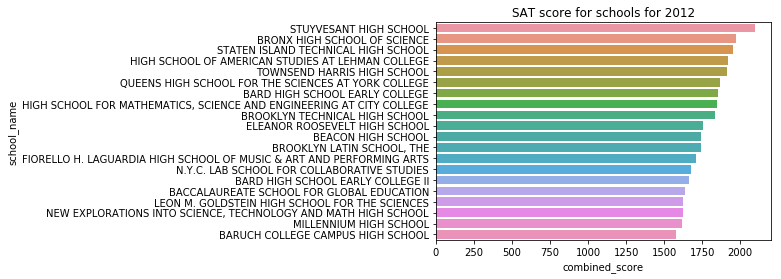

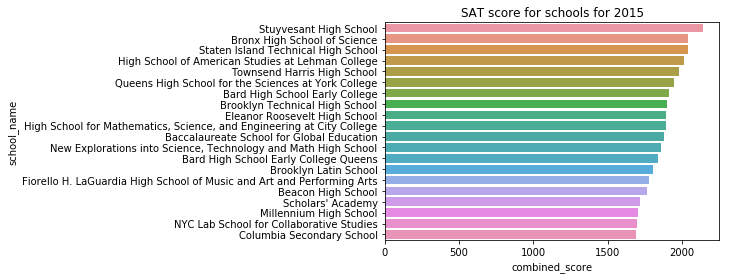

In [50]:
BAR_PLOT = 20

sns.barplot(y=SAT_df_2010_by_Schools[:BAR_PLOT]['school_name'],
            x=SAT_df_2010_by_Schools[:BAR_PLOT]['combined_score'],
            order=SAT_df_2010_by_Schools[:BAR_PLOT]['school_name'])
plt.title('SAT score for schools for 2010')
plt.show()

sns.barplot(y=SAT_df_2012_by_Schools[:BAR_PLOT]['school_name'],
            x=SAT_df_2012_by_Schools[:BAR_PLOT]['combined_score'],
            order=SAT_df_2012_by_Schools[:BAR_PLOT]['school_name'])
plt.title('SAT score for schools for 2012')
plt.show()

sns.barplot(y=SAT_df_2015_by_Schools[:BAR_PLOT]['school_name'],
            x=SAT_df_2015_by_Schools[:BAR_PLOT]['combined_score'],
            order=SAT_df_2015_by_Schools[:BAR_PLOT]['school_name'])
plt.title('SAT score for schools for 2015')
plt.show()

In [51]:
SAT_df_2010.head()

,District,Total_Takers,Combined_SAT_scores
21,22,1906,1424.000000
30,31,2552,1413.777778
25,26,2724,1395.400000
29,30,1242,1388.571429
27,28,2079,1361.250000


In [52]:
SAT_df_2012.head()

,District,Total_Takers,Combined_SAT_scores
21,22,1968,1389.400000
25,26,3039,1377.600000
30,31,3025,1359.166667
29,30,1546,1339.250000
27,28,2197,1336.727273


In [53]:
SAT_df_2015.head()

,District,Combined_SAT_scores
21,22,1524.000000
0,1,1447.666667
30,31,1439.000000
29,30,1425.444444
24,25,1421.625000


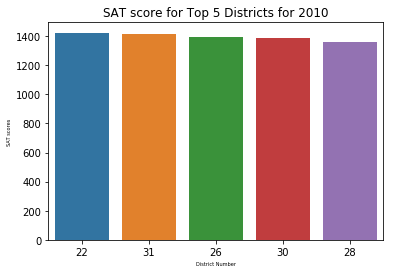

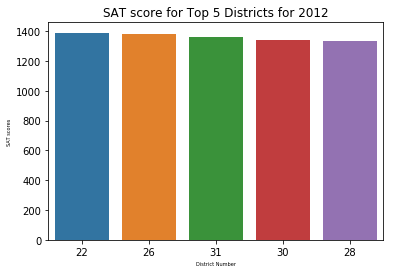

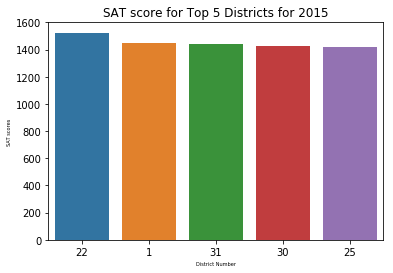

In [54]:
Slicing=5
sns.barplot(x=SAT_df_2010.District[:Slicing], y=SAT_df_2010.Combined_SAT_scores[:Slicing],order=SAT_df_2010.District[:Slicing])

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score for Top 5 Districts for 2010')
plt.show()

sns.barplot(x=SAT_df_2012.District[:Slicing], y=SAT_df_2012.Combined_SAT_scores[:Slicing],order=SAT_df_2012.District[:Slicing])

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score for Top 5 Districts for 2012')
plt.show()

sns.barplot(x=SAT_df_2015.District[:Slicing], y=SAT_df_2015.Combined_SAT_scores[:Slicing],order=SAT_df_2015.District[:Slicing])

plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.title('SAT score for Top 5 Districts for 2015')
plt.show()